In [1]:
import openpmd_api as io
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c
import sys

In [2]:
file = open("/bigdata/hplsim/external/marqua27/wtest/wtest_out/stdout", "r")
lines = file.readlines()
file.close()

file = open("/bigdata/hplsim/external/marqua27/wtest/wtest5_out/stdout", "r")
lines += file.readlines()
file.close()

Running program...

starting...

w0 = 2.3484903402640074e-05

w/w0 = 425.8054558945234

points in file: 512

approximate file size: 1.2 GB

0.09374999999999999

(15519, 1600)

w = 0.01

RGD


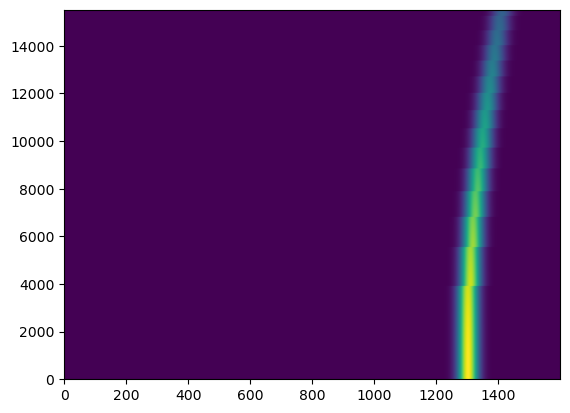

Axiparabola


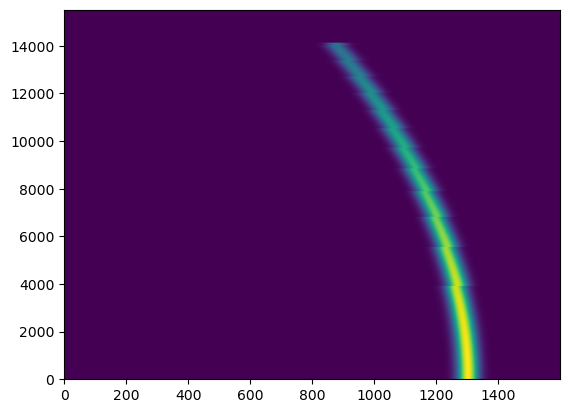

Propagate


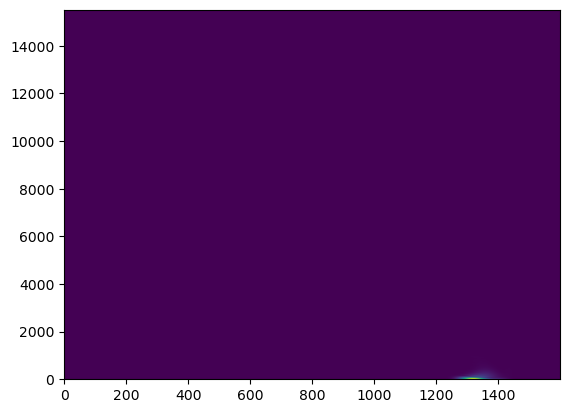

saved


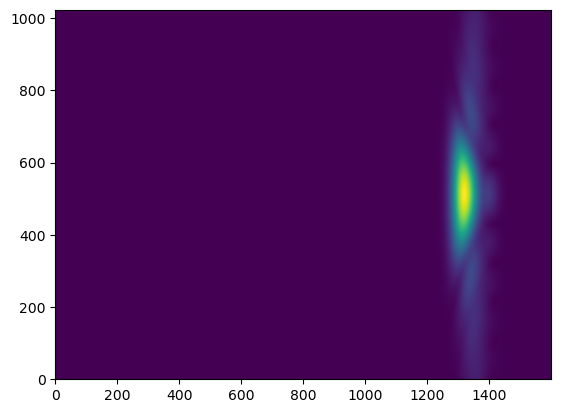

after_step 0


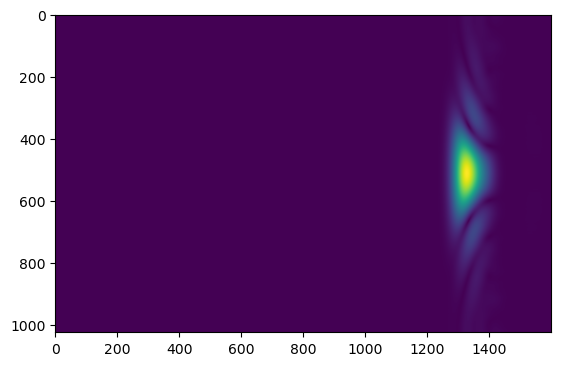

after_step 1


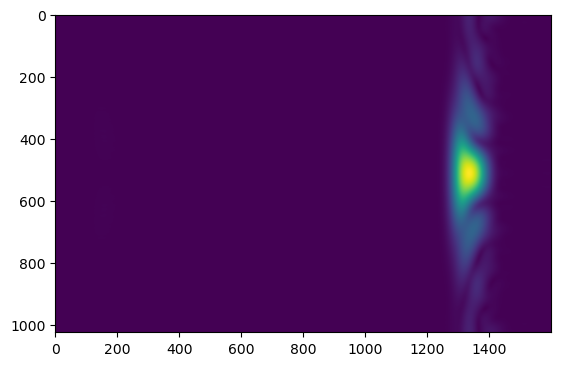

after_step 2


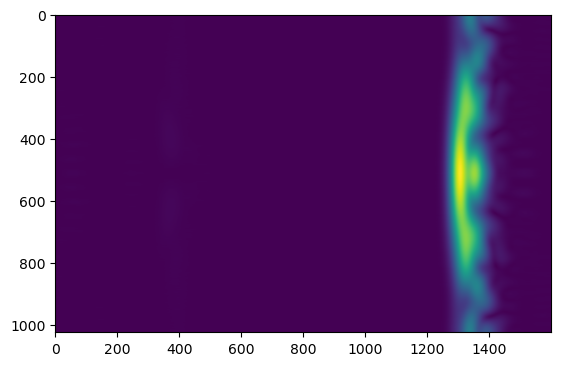

generate the laser

time: 0.06718599796295166 min

apply the RGD

time: 0.27266310453414916 min

apply the axiparabola

time: 0.3922919233640035 min

prpoagate the laser

Available backends are: NP

NP is chosen

time: 23.96508644024531 min

extracting full field...


Offsetting by 0.093 percent of the original field

saving...

transposing

Data type: float32

flushing

done

time: 31.663169320424398 min

propagating further

Available backends are: NP

NP is chosen

0.7066666666666667

time: 45.29274669090907 min

0.7133333333333333

time: 61.0862953821818 min

0.72

time: 77.3214205622673 min

0.09374999999999999

(31038, 1600)

w = 0.02

RGD


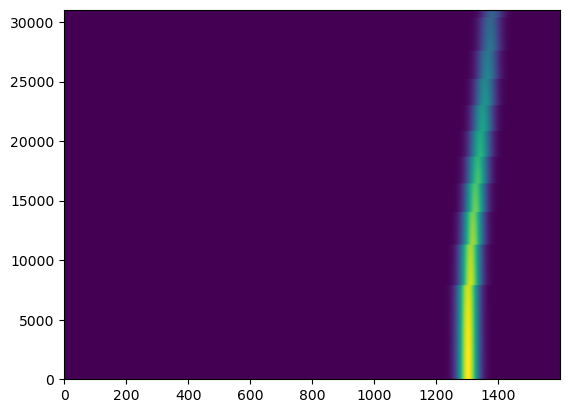

Axiparabola


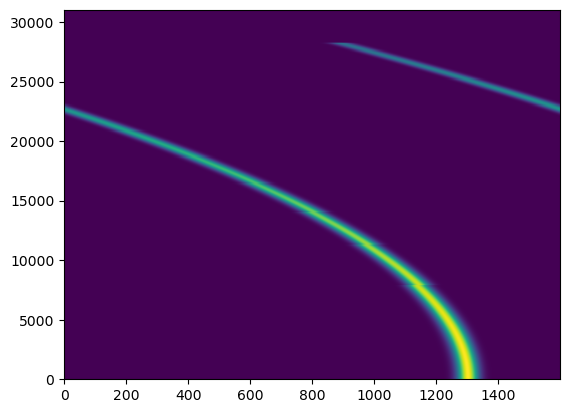

Propagate


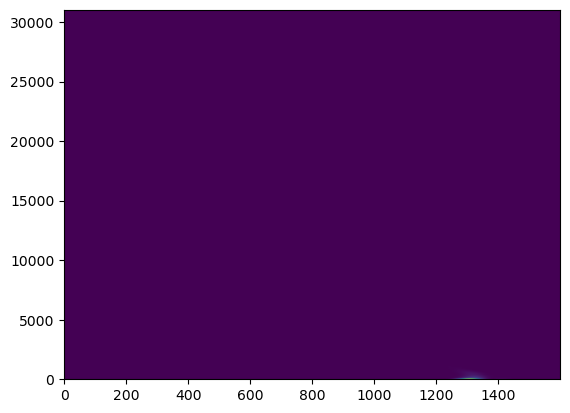

saved


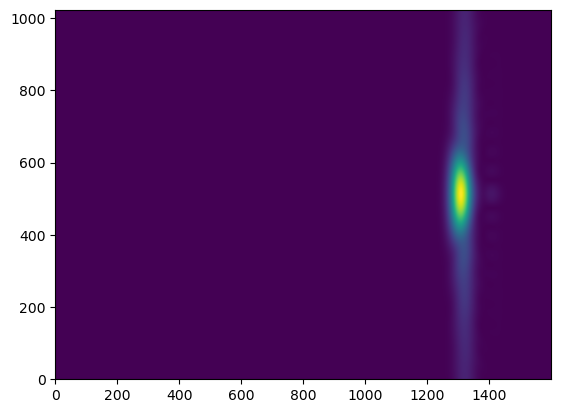

after_step 0


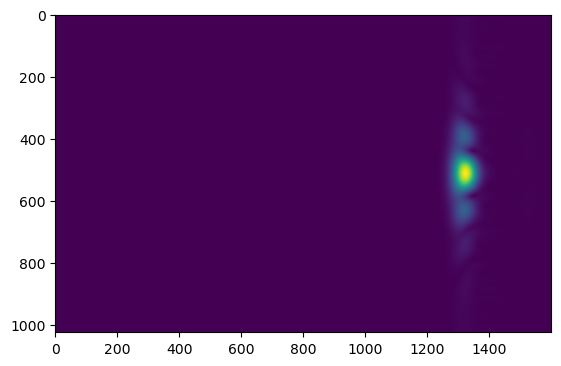

after_step 1


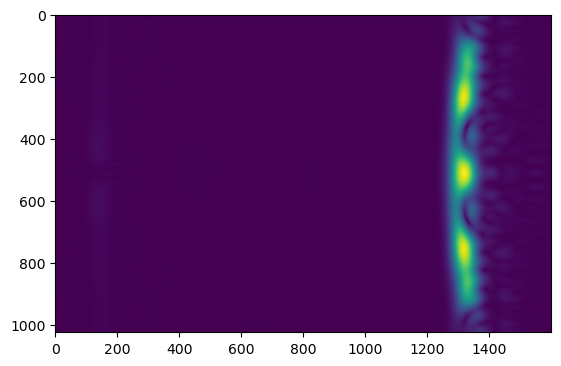

after_step 2


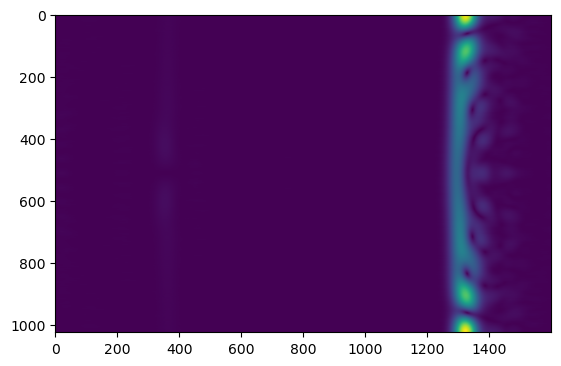

generate the laser

time: 0.13338889678319296 min

apply the RGD

time: 0.41069862445195515 min

apply the axiparabola

time: 0.6748266458511353 min

prpoagate the laser

Available backends are: NP

NP is chosen

time: 92.7491309762001 min

extracting full field...


Offsetting by 0.093 percent of the original field

saving...

transposing

Data type: float32

flushing

done

time: 99.76228135029474 min

propagating further

Available backends are: NP

NP is chosen

0.7066666666666667

time: 115.99942308664322 min

0.7133333333333333

time: 132.5173078417778 min

0.72

time: 149.2690695285797 min

0.09374999999999999

(46557, 1600)

w = 0.03

RGD


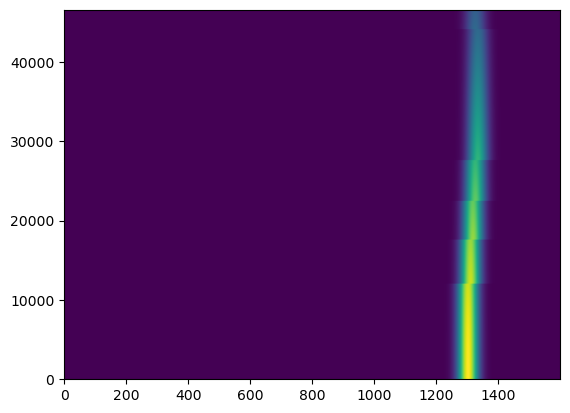

Axiparabola


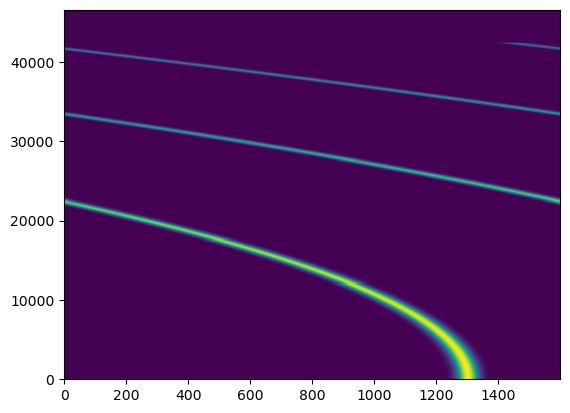

Propagate


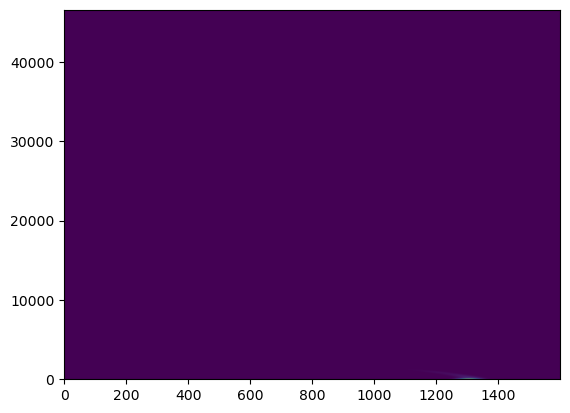

saved


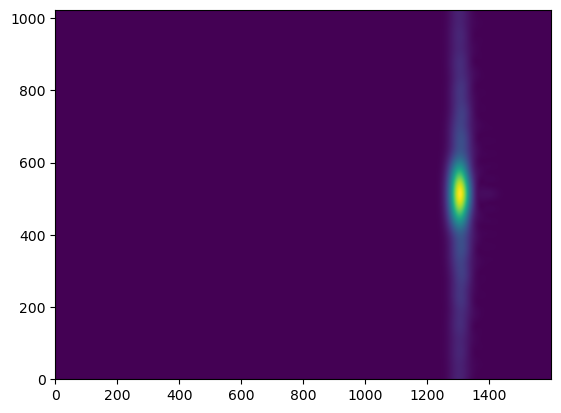

after_step 0


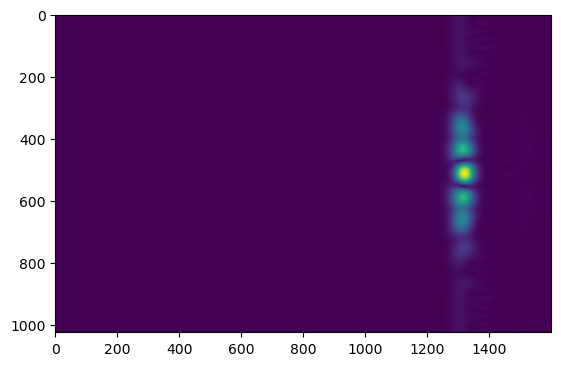

after_step 1


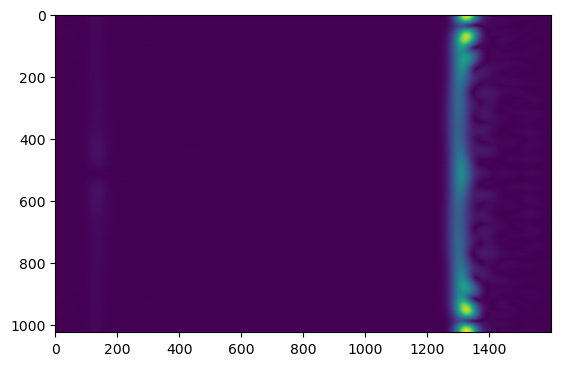

after_step 2


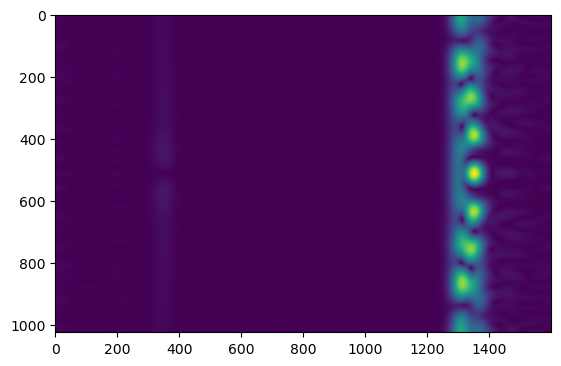

generate the laser

time: 0.19816371997197468 min

apply the RGD

time: 0.7646400570869446 min

apply the axiparabola

time: 1.1606974482536316 min

prpoagate the laser

Available backends are: NP

NP is chosen

time: 283.5291197697322 min

extracting full field...


Offsetting by 0.093 percent of the original field

saving...

transposing

Data type: float32

flushing

done

time: 291.02933842341105 min

propagating further

Available backends are: NP

NP is chosen

0.7066666666666667

time: 309.782323718071 min

0.7133333333333333

time: 328.1330199400584 min

0.72

time: 348.40148008267084 min

0.09374999999999999

(62076, 1600)

w = 0.04

RGD


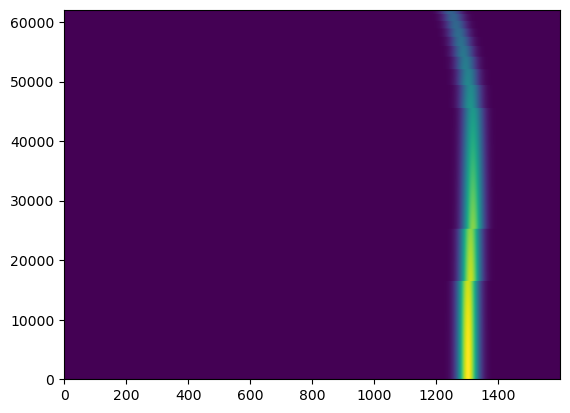

Axiparabola


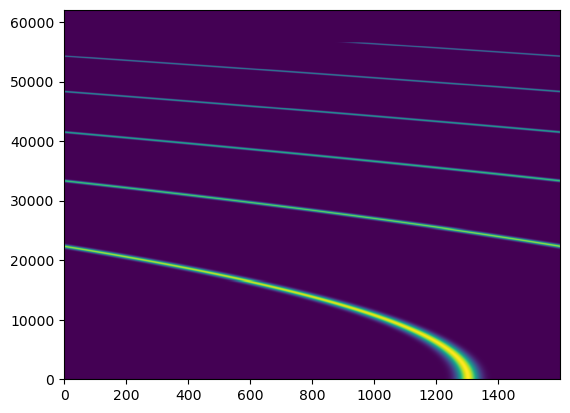

Propagate


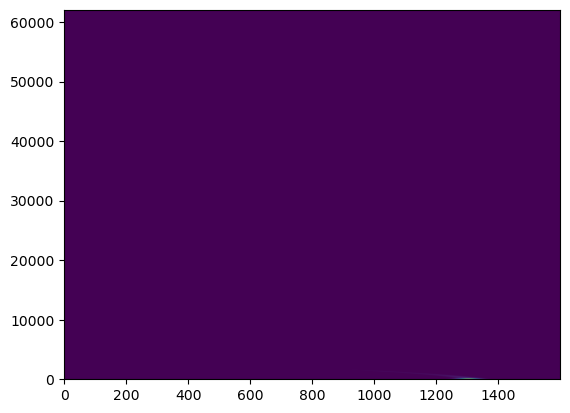

saved


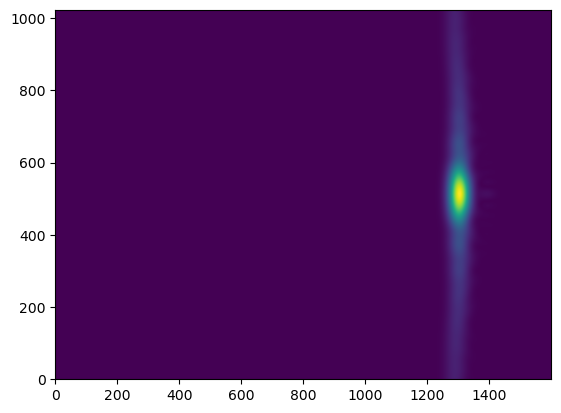

after_step 0


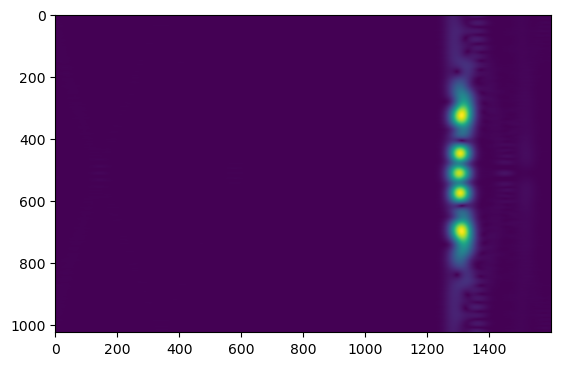

after_step 1


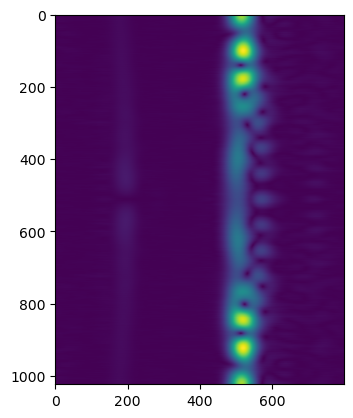

after_step 2


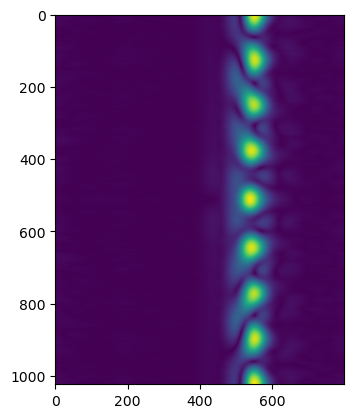

generate the laser

time: 0.270516570409139 min

apply the RGD

time: 0.8680813074111938 min

apply the axiparabola

time: 1.4241450031598408 min

prpoagate the laser

Available backends are: NP

NP is chosen

time: 610.4946357091268 min

extracting full field...


Offsetting by 0.093 percent of the original field

saving...

transposing

Data type: float32

flushing

done



------------------------------

- - - - - job epilog - - - - -

------------------------------

Job ID: 15243895

was running on nodes: gv023

by user: marqua27

in partition: fwkt_v100

using account: fwkt_v100

number of CPUs used: 16

number of nodes requested: 1

------------------------------

walltime reqd: 1-00:00:00

walltime used: 19:51:16

------------------------------

Tue Oct 7 07:25:56 CEST 2025

------------------------------



Running program...

starting...

w0 = 2.3484903402640074e-05

w/w0 = 425.8054558945234

points in file: 512

approximate file size: 1.2 GB

0.09374999999999999

(77595, 1600

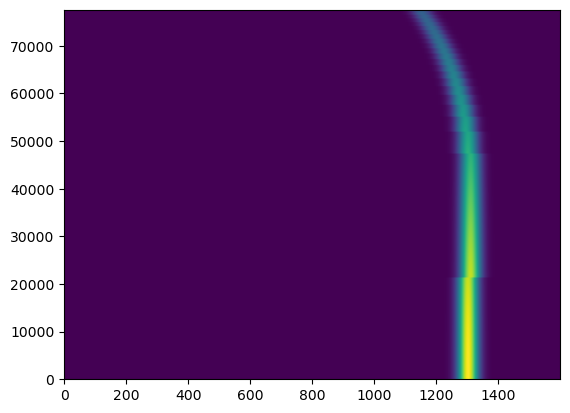

Axiparabola


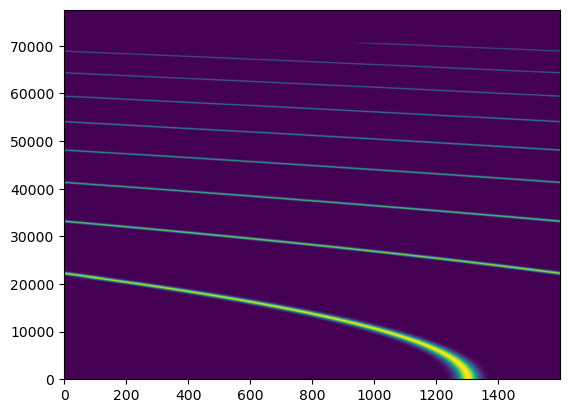

Propagate


HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 0:
  #000: H5F.c line 620 in H5Fopen(): unable to open file
    major: File accessibility
    minor: Unable to open file
  #001: H5VLcallback.c line 3501 in H5VL_file_open(): failed to iterate over available VOL connector plugins
    major: Virtual Object Layer
    minor: Iteration failed
  #002: H5PLpath.c line 578 in H5PL__path_table_iterate(): can't iterate over plugins in plugin path '(null)'
    major: Plugin for dynamically loaded library
    minor: Iteration failed
  #003: H5PLpath.c line 620 in H5PL__path_table_iterate_process_path(): can't open directory: /usr/local/hdf5/lib/plugin
    major: Plugin for dynamically loaded library
    minor: Can't open directory or file
  #004: H5VLcallback.c line 3351 in H5VL__file_open(): open failed
    major: Virtual Object Layer
    minor: Can't open object
  #005: H5VLnative_file.c line 97 in H5VL__native_file_open(): unable to open file
    major: File accessibility
    minor: Unable to o

Error: Read Error in backend HDF5
Object type:	File
Error type:	Inaccessible
Further description:	Failed to open HDF5 file /bigdata/hplsim/external/marqua27/wtest/wtest_out/w0_05/Propagate_00002.h5

In [3]:
show_after = 3
for line in lines:
    print(line)
    if "w =" in line:
        strw = "w"+line[-5:-1].replace(".", "_")
        dirw = "/bigdata/hplsim/external/marqua27/wtest/wtest_out/"+strw+"/"
        m = 0
        for n, f in enumerate(["RGD","Axiparabola","Propagate","saved"]):
            print(f)
            series = io.Series(dirw+f+"_0000"+str(n)+".h5",io.Access.read_only)
            field = series.iterations[n].meshes["laserEnvelope"][:, :, :]
            series.flush()
            if f == "saved":
                field = field[:,:, field.shape[-1]//2]
            plt.imshow(np.abs(field).transpose(), aspect="auto", origin="lower")
            plt.show()
            series.close()
            m = n
        if show_after:
            for n in range(show_after):
                print("after_step", n)
                series = io.Series(dirw+"after_step"+str(n)+"_0000"+str(n+m+1)+".h5",io.Access.read_only)
                field = series.iterations[n+m+1].meshes["laserEnvelope"][:, :, :]
                series.flush()
                plt.imshow(np.abs(field[:,field.shape[1]//2,:]).transpose(), aspect=1.0)
                plt.show()
                series.close()
                